# Diamond cut analysis

## Objective

Objective of this project is to accurately predict the price of a diamond.
There are various factors (variables) that affect the price of a diamond. In this project, we will analyze the price of a diamond based on those factors.

## Data

### Data Sourcing

The data is sourced from kaggle website.
https://www.kaggle.com/shivam2503/diamonds

<u>Data description. We will use this for our analysis.</U>

price = price in US dollars (\$326--\$18,823)

carat =weight of the diamond (0.2--5.01)

cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color = diamond colour, from J (worst) to D (best)

clarity =  a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x = length in mm (0--10.74)

y = width in mm (0--58.9)

z = depth in mm (0--31.8)

depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table = width of top of diamond relative to widest point (43--95)

## Exploratory Data Analysis

In [1]:
import pandas as pd
data = pd.read_csv('data_diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
data.shape

(53940, 11)

There are 53k records and 10 variables

In [3]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [4]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Remove unwated variables

In [5]:
# the variable Unnamed: 0 is not relevent for the analysis. Its more of a ID column and it can be safely ignored
data.drop(columns=['Unnamed: 0'], inplace=True)
data.columns.T

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Analyze Missing values

In [6]:
# quick check on null in the data
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values. All the column can be used for our analysis

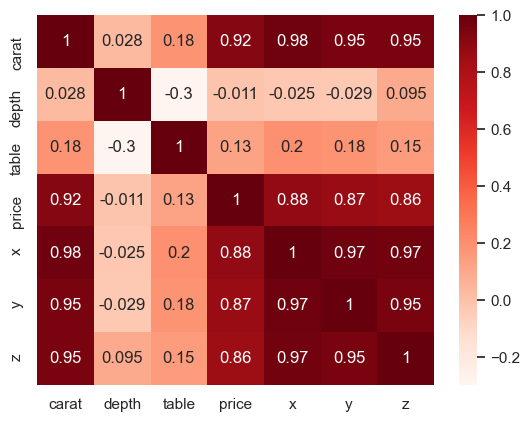

In [7]:
# Lets visualize the data 
# Correlation matrix visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=plt.cm.Reds)
plt.show()

From the correlation matrix, we can see that the variables price, x, y, z are highly correlated.
we can remove x, y, z and keep price.

In [8]:
# drop the variables with high correlation
# data.drop(columns=['y','z'], inplace=True)

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


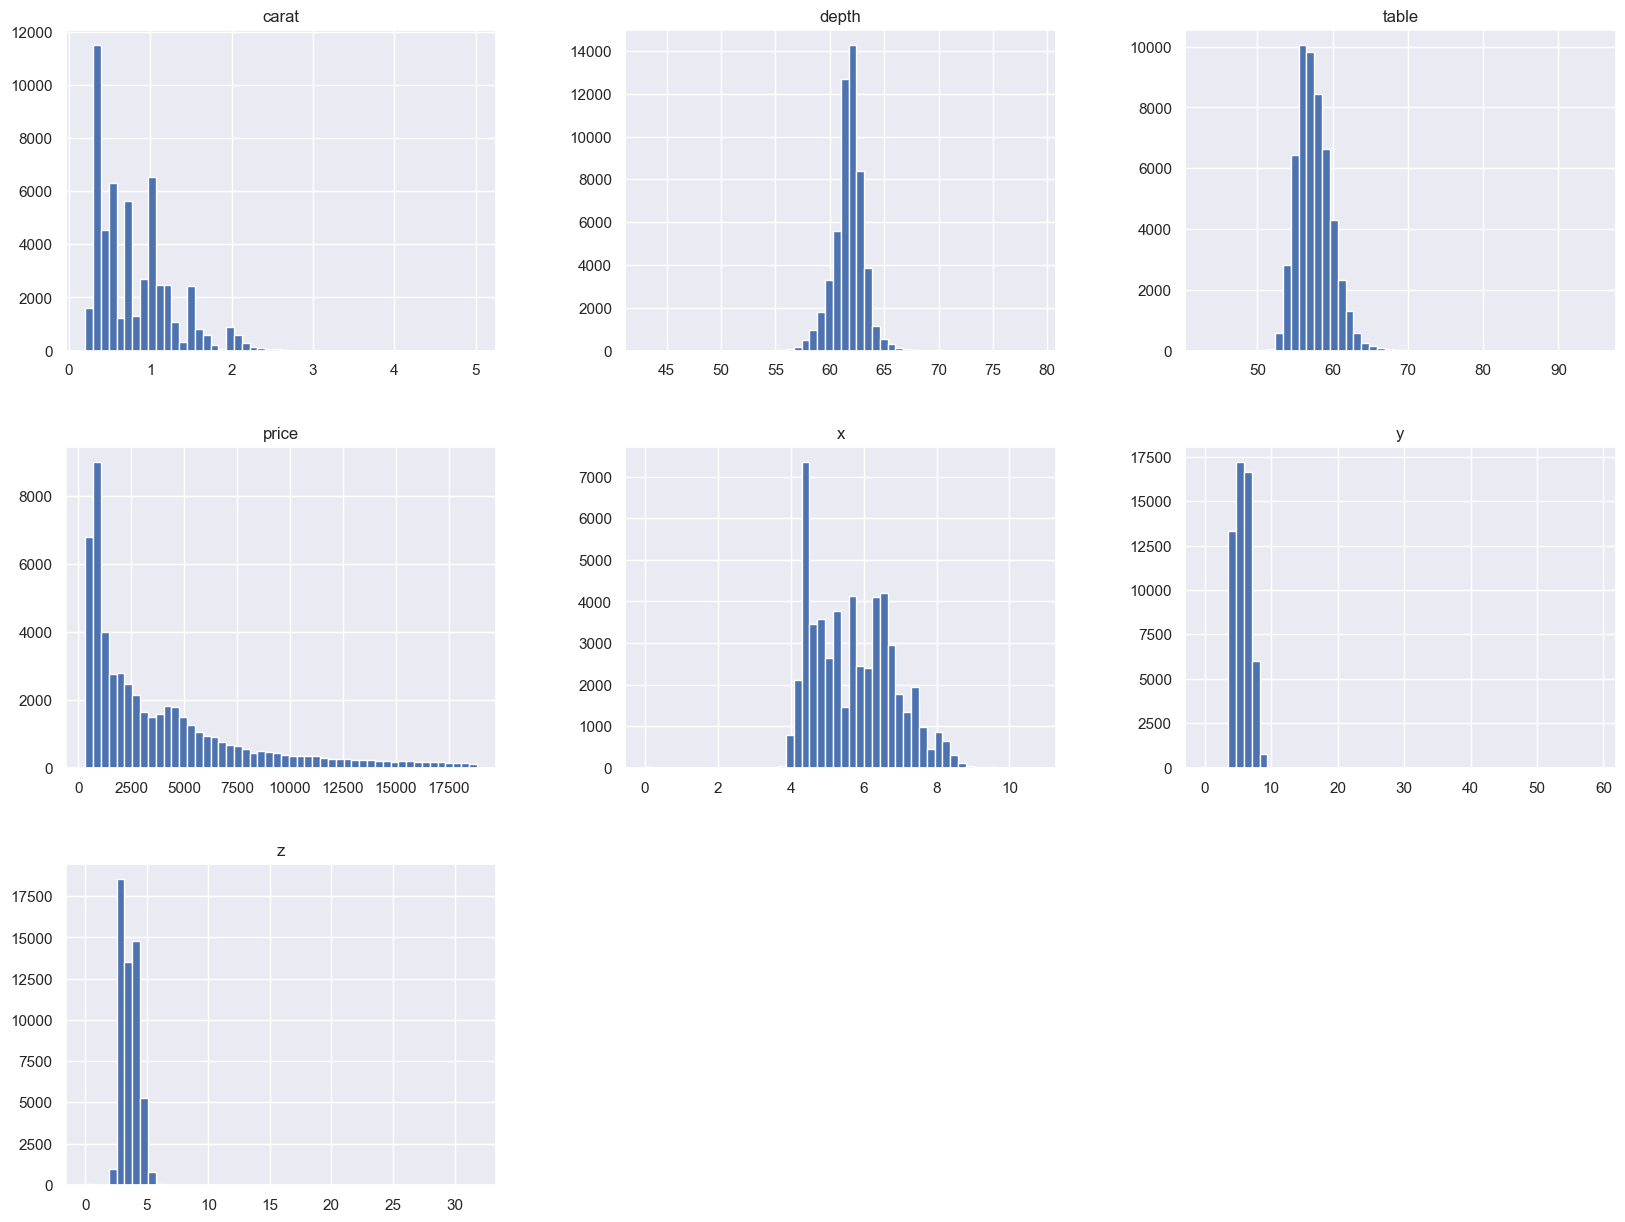

In [10]:
# Lets check the distribution of the data
data.hist(bins=50, figsize=(20,15))
plt.show()

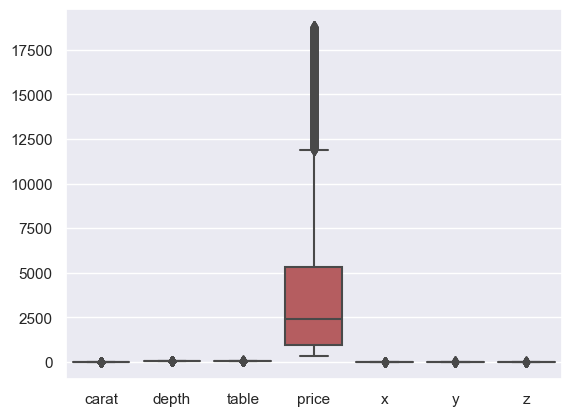

In [11]:
# let check for any outliers
sns.boxplot(data=data)
plt.show()

We could see there are some outliers in the price column. For now we do not remove it. Let us see if we can remove the outliers later.

## Feature Engineering

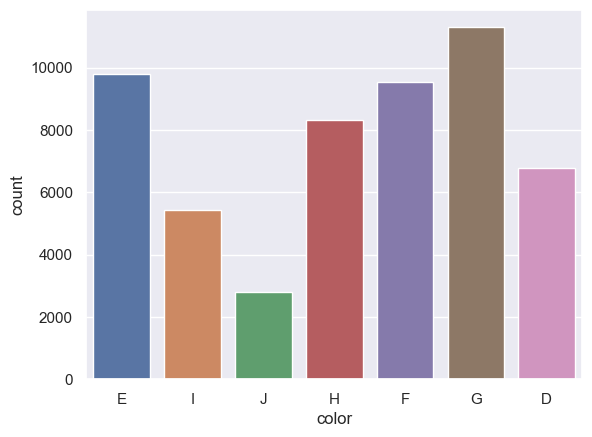

In [12]:
# for the categorical variables we can use the countplot to see the distribution of the data
sns.countplot(x='color', data=data)
plt.show()

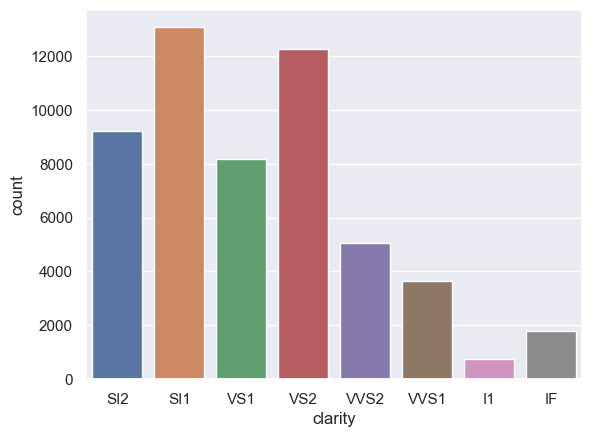

In [13]:
sns.countplot(x='clarity', data=data)
plt.show()

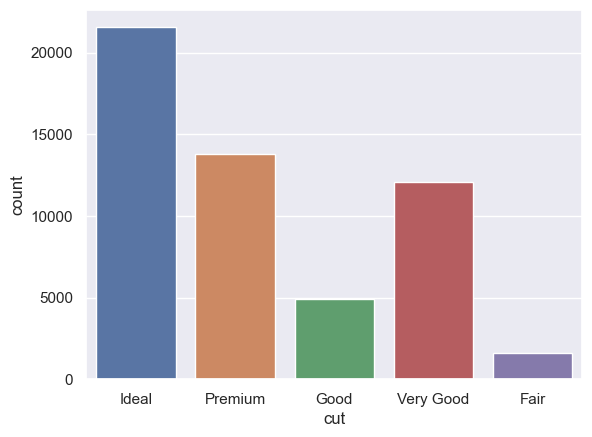

In [14]:
sns.countplot(x='cut', data=data)
plt.show()

In [15]:
# we have below categorical variables. we need to transform them into numerical variables
# as per the requirement we need to use the dummy variables. The categories are ordinal
data['cut'] = data['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
data['color'] = data['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
data['clarity'] = data['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [16]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Model Building

In [17]:
# We will not scale the data first. We will scale the data after we have done the analysis
X = data.drop(columns=['price'])
y = data['price']

In [19]:
# Lets split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# define rmse function
import numpy as np
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Models without Scaling

In [21]:
# Lets use Linear Regression
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [22]:
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

1201.2077317517576


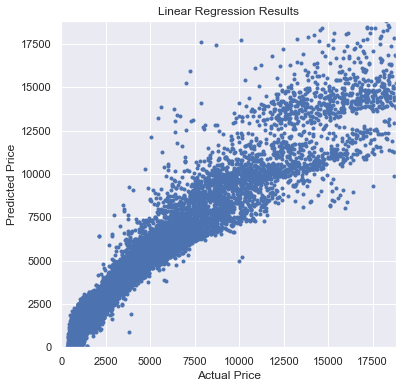

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [24]:
# Lets use the Lasso Regression
from sklearn.linear_model import Lasso
lassoRegression = Lasso()
lassoRegression.fit(X_train, y_train)
lassoRegression_rmse = rmse(y_test, lassoRegression.predict(X_test))
lassoRegression_rmse

1201.5721272188778

In [25]:
# the score between Liner and Lasso Regression is very minor. Lets try with ridge regression
from sklearn.linear_model import Ridge
ridgeRegression = Ridge()
ridgeRegression.fit(X_train, y_train)
ridgeRegression_rmse = rmse(y_test, ridgeRegression.predict(X_test))
ridgeRegression_rmse


1201.2489660741646

### Model with Scaling

In [26]:
# we havnt used any custom alphas. Without scaling the scores between the models are very similar.
# Lets try with MinMax Scaling. We taken the reference from the link below
# https://datascience.stackexchange.com/questions/44009/scaling-label-encoded-values-for-linear-algorithms
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
linearRegression = LinearRegression()
linearRegression.fit(X_train_scaled, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test_scaled))
lassoRegression = Lasso()
lassoRegression.fit(X_train_scaled, y_train)
lassoRegression_rmse = rmse(y_test, lassoRegression.predict(X_test_scaled))
ridgeRegression = Ridge()
ridgeRegression.fit(X_train_scaled, y_train)
ridgeRegression_rmse = rmse(y_test, ridgeRegression.predict(X_test_scaled))
(linearRegression_rmse, lassoRegression_rmse, ridgeRegression_rmse)

(1201.2077317517578, 1207.505274155642, 1204.0125324315045)

In [28]:
# there are no improvement in the scores. We can conclude that the data is not scaled.

### Models with Scaling and Cross Validation

In [35]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80], cv=5)
ridgeCV.fit(X_train_scaled, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_scaled))
print(ridgeCV.alpha_, ridgeCV_rmse)

0.3 1201.7293422060393


In [36]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80], cv=5, max_iter=10000)
lassoCV.fit(X_train_scaled, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test_scaled))
print(lassoCV.alpha_, lassoCV_rmse)

0.05 1201.377746019673


In [37]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80], cv=5, max_iter=10000)
elasticNetCV.fit(X_train_scaled, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test_scaled))
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.005 0.5 1436.3297976166275


In [38]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,1201.207732
Ridge,1201.729342
Lasso,1201.377746
ElasticNet,1436.329798


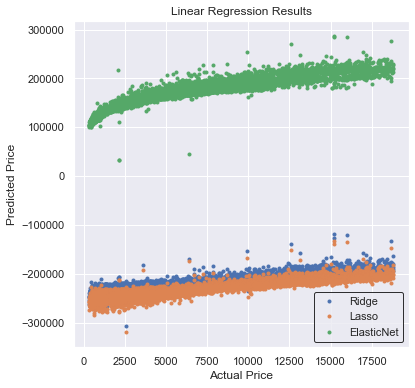

In [39]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

## Other Regression Techniques

In [51]:
# XGBoost Regressor
import xgboost as xgb
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# elastic net regressor
from sklearn.linear_model import ElasticNet
# import pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
# catboost regressor
from catboost import CatBoostRegressor

Fitting Linear
Fitting Lasso
Fitting Ridge
Fitting ElasticNet
Fitting CatBoost
Fitting SGD
Fitting XGBoost
Fitting RandomForest
Fitting DecisionTree


,RMSE
Linear,1201.207732
Lasso,1207.505274
Ridge,1204.012532
ElasticNet,1436.329798
CatBoost,515.413999
SGD,1237.525854
XGBoost,543.243708
RandomForest,538.256622
DecisionTree,740.379380


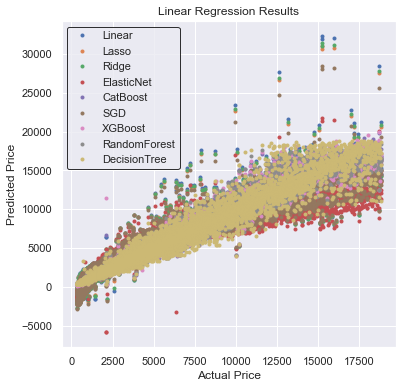

In [56]:
# create pipeline for each model
f = plt.figure(figsize=(6,6))
ax = plt.axes()
new_rmses = {}
model_pipelines = {
    'Linear': Pipeline([('scaler', scaler), ('linear', linearRegression)]),
    'Lasso': Pipeline([('scaler', scaler), ('lasso', lassoRegression)]),
    'Ridge': Pipeline([('scaler', scaler), ('ridge', ridgeRegression)]),
    'ElasticNet': Pipeline([('scaler', scaler), ('elasticNet', elasticNetCV)]),
    'CatBoost': Pipeline([ ('catboost', CatBoostRegressor(verbose=False))]), 
    'SGD': Pipeline([('scaler', scaler), ('SGD', SGDRegressor())]),
    'XGBoost': Pipeline([('scaler', scaler), ('XGBoost', xgb.XGBRegressor())]),
    'RandomForest': Pipeline([('scaler', scaler), ('RandomForest', RandomForestRegressor())]),
    'DecisionTree': Pipeline([('scaler', scaler), ('DecisionTree', DecisionTreeRegressor())]),
}
# fit each model
for model_label, model_pipeline in model_pipelines.items():
    print(f'Fitting {model_label}')
    model_pipeline.fit(X_train, y_train)
    new_rmses[model_label] = rmse(y_test, model_pipeline.predict(X_test))
    ax.plot(y_test, model_pipeline.predict(X_test),  marker='o', ls='',
     ms=3.0, label=model_label)
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');
# create dataframe of new rmse values
new_rmses_df = pd.Series(new_rmses, index=model_pipelines.keys()).to_frame()
new_rmses_df.rename(columns={0: 'RMSE'}, inplace=1)

new_rmses_df

# Conclusion

Based on the analysis we could conclude that <b><u>Catboost</u></b> is the best model for this project. It has the best accuracy and the best performance.
We can also revisit the same model if we get additional data about the diamonds in other categories.